# NYC Airbnb Review


Create a function that will analyze the "comment" column and calculate a sentiment value. Make a new column in the dataframe that will contain the sentiment value for each review.





### Sentiment Analysis

In order to understand how people feel about something, we need to do sentiment analysis on text data that contains their opinion.

The VADER Sentiment Intensity Analyzer returns a score between -1 to 1. Scores closer to -1 have a negative sentiment, scores closer to 1 have a positive sentiment, and scores around 0 are considered neutral.

In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#this is sample data
from nltk.corpus import names  

from string import punctuation

import matplotlib.pyplot as plt

import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px


In [2]:
#initilize function to do sentiment analysis
sid = SentimentIntensityAnalyzer()

In [3]:
#list of english stopwords
eng_stopwords = stopwords.words('english')
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [4]:
import pandas as pd

#load the data from the Reviews.csv file
# reviews for Girl on the train
filepath = "datasets/df_text.csv"
df = pd.read_csv(filepath) #this file is encoded differently

df.head()

,Unnamed: 0,listing_id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,comments,neighbourhood_group
0,0,2060,2259,Jenny,Washington Heights,40.85722,-73.93790,Private room,$100.00,1,1,2008-09-22,0.01,365,"very nice neighborhood,close enough to ""A"" tra...",Manhattan
1,1,3831,361855,Kurt,Washington Heights,40.83403,-73.93951,Entire home/apt,$265.00,3,35,2020-01-27,0.42,329,"Spacious, near public transportation, good pri...",Manhattan
2,2,3831,523218,Giorgio,Washington Heights,40.85295,-73.93361,Private room,$67.00,2,151,2020-02-18,1.39,298,A well located spot in a quieter neighbourhood...,Manhattan
3,3,5099,793620,Yvette,Washington Heights,40.84468,-73.94303,Private room,$75.00,2,40,2020-02-01,0.38,272,"Tinas Appartement war so wie beschrieben, es i...",Manhattan
4,4,5178,1423613,Arthur,Washington Heights,40.85774,-73.92901,Entire home/apt,$65.00,85,21,2020-03-03,0.36,230,My first experience using airbnb was great! Th...,Manhattan


In [5]:
df.isnull().sum()

Unnamed: 0                0
listing_id                0
host_id                   0
host_name                 4
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
last_review            4691
reviews_per_month      4691
availability_365          0
comments                  6
neighbourhood_group       0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Unnamed: 0             0
listing_id             0
host_id                0
host_name              0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
last_review            0
reviews_per_month      0
availability_365       0
comments               0
neighbourhood_group    0
dtype: int64

In [8]:
#create a function to clean up each review
#then it will analyze and assign a sentiment polarity
def reviewSentiment(review):
    
    #make text lowercase
    review = review.lower()
    
    #tokenize the review
    #tknz_review is alist
    tknz_review = word_tokenize(review)
    
    #remove puntuation
    for token in tknz_review:
        if token in punctuation:
            tknz_review.remove(token)
    
    #empty list to hold "cleaned" tokens
    clean_tokens = []
    
    #remove filler words
    for token in tknz_review:
        if token not in eng_stopwords:
            clean_tokens.append(token)
            
    #put sentence back together with remaining clean words
    clean_review = ' '.join(clean_tokens)
    
    #get the polarity scores dictionary
    sid_rev = sid.polarity_scores(clean_review)
    
    #get sentiment polarity from the "compound" key in the sid_rev dictionary
    r_comp = sid_rev['compound']
    
    #return the sentiment value
    return r_comp

In [9]:
#create a new column to hold sentiment value from function
df['review_sentiment'] = df['comments'].apply(reviewSentiment)

In [10]:
#erify sentiment values in new column
df.head()

,Unnamed: 0,listing_id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,comments,neighbourhood_group,review_sentiment
0,0,2060,2259,Jenny,Washington Heights,40.85722,-73.93790,Private room,$100.00,1,1,2008-09-22,0.01,365,"very nice neighborhood,close enough to ""A"" tra...",Manhattan,0.9552
1,1,3831,361855,Kurt,Washington Heights,40.83403,-73.93951,Entire home/apt,$265.00,3,35,2020-01-27,0.42,329,"Spacious, near public transportation, good pri...",Manhattan,0.2960
2,2,3831,523218,Giorgio,Washington Heights,40.85295,-73.93361,Private room,$67.00,2,151,2020-02-18,1.39,298,A well located spot in a quieter neighbourhood...,Manhattan,0.8689
3,3,5099,793620,Yvette,Washington Heights,40.84468,-73.94303,Private room,$75.00,2,40,2020-02-01,0.38,272,"Tinas Appartement war so wie beschrieben, es i...",Manhattan,-0.9761
4,4,5178,1423613,Arthur,Washington Heights,40.85774,-73.92901,Entire home/apt,$65.00,85,21,2020-03-03,0.36,230,My first experience using airbnb was great! Th...,Manhattan,0.9217


In [11]:
df.dtypes

Unnamed: 0               int64
listing_id               int64
host_id                  int64
host_name               object
neighbourhood           object
latitude               float64
longitude              float64
room_type               object
price                   object
minimum_nights           int64
number_of_reviews        int64
last_review             object
reviews_per_month      float64
availability_365         int64
comments                object
neighbourhood_group     object
review_sentiment       float64
dtype: object

In [12]:
#create a function to assign a polarity category to the sentiment
def sentimentCategory(sent_num):
    if sent_num >= 0.2:
        return "positive"
    if sent_num <= -0.2:
        return "negative"
    else:
        return "neutral"

In [13]:
#create a new column to hold sentiment category
df['sentiment_category'] = df['review_sentiment'].apply(sentimentCategory)

In [14]:
df.head(3)

,Unnamed: 0,listing_id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,comments,neighbourhood_group,review_sentiment,sentiment_category
0,0,2060,2259,Jenny,Washington Heights,40.85722,-73.93790,Private room,$100.00,1,1,2008-09-22,0.01,365,"very nice neighborhood,close enough to ""A"" tra...",Manhattan,0.9552,positive
1,1,3831,361855,Kurt,Washington Heights,40.83403,-73.93951,Entire home/apt,$265.00,3,35,2020-01-27,0.42,329,"Spacious, near public transportation, good pri...",Manhattan,0.2960,positive
2,2,3831,523218,Giorgio,Washington Heights,40.85295,-73.93361,Private room,$67.00,2,151,2020-02-18,1.39,298,A well located spot in a quieter neighbourhood...,Manhattan,0.8689,positive


In [15]:
#compare frequency of positive, negative, and neutral reviews
df['sentiment_category'].value_counts()

positive    16011
neutral      1547
negative      445
Name: sentiment_category, dtype: int64

In [16]:
df[df['sentiment_category']== 'positive'].head(3)

,Unnamed: 0,listing_id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,comments,neighbourhood_group,review_sentiment,sentiment_category
0,0,2060,2259,Jenny,Washington Heights,40.85722,-73.93790,Private room,$100.00,1,1,2008-09-22,0.01,365,"very nice neighborhood,close enough to ""A"" tra...",Manhattan,0.9552,positive
1,1,3831,361855,Kurt,Washington Heights,40.83403,-73.93951,Entire home/apt,$265.00,3,35,2020-01-27,0.42,329,"Spacious, near public transportation, good pri...",Manhattan,0.2960,positive
2,2,3831,523218,Giorgio,Washington Heights,40.85295,-73.93361,Private room,$67.00,2,151,2020-02-18,1.39,298,A well located spot in a quieter neighbourhood...,Manhattan,0.8689,positive


In [17]:
df[df['sentiment_category']== 'negative'].head(10)

,Unnamed: 0,listing_id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,comments,neighbourhood_group,review_sentiment,sentiment_category
3,3,5099,793620,Yvette,Washington Heights,40.84468,-73.94303,Private room,$75.00,2,40,2020-02-01,0.38,272,"Tinas Appartement war so wie beschrieben, es i...",Manhattan,-0.9761,negative
204,204,54508,75973505,Jeanette,Washington Heights,40.86027,-73.92640,Private room,$40.00,3,28,2020-03-12,1.72,339,Es war eine sehr schöne Entdeckungsfahrt mit ...,Manhattan,-0.9661,negative
217,217,56859,59111337,Meredith,Washington Heights,40.85029,-73.93602,Private room,$42.00,2,3,2018-08-22,0.09,0,La chambre (conforme aux photos) était propre ...,Manhattan,-0.2500,negative
278,278,66718,25914748,Amy,Washington Heights,40.85094,-73.94035,Entire home/apt,$90.00,3,3,2019-09-02,0.15,17,Hemos pasado 9 días en casa de Hennig muy a gu...,Manhattan,-0.2960,negative
307,307,94477,233732841,Ori,Washington Heights,40.83495,-73.94682,Entire home/apt,$150.00,2,1,2020-03-01,0.71,364,The only regret you’ll have is not being able ...,Manhattan,-0.4215,negative
332,332,106363,27973267,Gus,Washington Heights,40.85115,-73.93223,Private room,$150.00,2,27,2020-03-17,2.47,136,In Alicia's Apartment ist ein künstlerischer G...,Manhattan,-0.9750,negative
429,429,3831,116599,Sahr,Clinton Hill,40.68513,-73.96648,Private room,$165.00,4,13,2019-12-10,0.12,364,Die Wohnung liegt zentral in Brooklyn. Mit Bus...,Brooklyn,-0.8316,negative
560,560,29455,1524765,Christopher,Clinton Hill,40.68701,-73.96174,Entire home/apt,$140.00,3,4,2016-08-07,0.09,0,"Die U Bahn ist nicht weit entfernt, Einkaufsmö...",Brooklyn,-0.8481,negative
604,604,45910,68302204,Samuel,Clinton Hill,40.68076,-73.95751,Private room,$100.00,5,4,2018-04-22,0.11,88,"This place is big enough for 9 people, but it ...",Brooklyn,-0.6745,negative
686,686,66741,319077,Shell,Clinton Hill,40.68550,-73.96112,Private room,$235.00,30,2,2018-11-18,0.11,353,Wir waren Anfang Dezember 2018 in diesem tolle...,Brooklyn,-0.9618,negative


### Positive

In [18]:
df['comments'].iloc[0]

'very nice neighborhood,close enough to "A" train,\r\ncomfortable bed and clean home over all.\r\nJennys cat is very sweet and fun to play with, but wants to sleep in bed with you and won\'t shut up unless such privilages are granted . . .\r\nMeyow meyow meyow.'

In [19]:
df['review_sentiment'].iloc[0]

0.9552

In [20]:
df['sentiment_category'].iloc[0]

'positive'

### Nagative

In [21]:
df[df['listing_id']== 94477]

,Unnamed: 0,listing_id,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,availability_365,comments,neighbourhood_group,review_sentiment,sentiment_category
305,305,94477,24973324,Matthew,Washington Heights,40.85355,-73.93232,Entire home/apt,$125.00,2,6,2019-10-21,0.43,87,"Gran anfitrión, muy amable. El departamento es...",Manhattan,0.0000,neutral
306,306,94477,17174170,Angela,Washington Heights,40.85197,-73.92853,Entire home/apt,$74.00,1,4,2019-03-24,0.30,0,当日はあいにくの雨でしたが､薄暗い本堂の中で雨音をBGMに坐禅を組むというｱｼﾞのある体験と...,Manhattan,0.0000,neutral
307,307,94477,233732841,Ori,Washington Heights,40.83495,-73.94682,Entire home/apt,$150.00,2,1,2020-03-01,0.71,364,The only regret you’ll have is not being able ...,Manhattan,-0.4215,negative
1415,1415,94477,10239868,Kiersten,Upper West Side,40.78106,-73.98105,Entire home/apt,$215.00,4,4,2020-01-01,0.29,98,"What a wonderful apartment, location, experien...",Manhattan,0.9843,positive
1416,1416,94477,244438661,Bel,Upper West Side,40.79660,-73.97428,Private room,$77.00,3,3,2020-03-06,0.25,56,Amazing experience with a monk in an old templ...,Manhattan,0.8176,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22346,22346,94477,131995652,Henry,Tremont,40.84994,-73.90660,Entire home/apt,$148.00,3,12,2019-10-28,0.90,312,Vernon was very helpful and welcomed us with o...,Bronx,0.9799,positive
22347,22347,94477,207640201,Denny,Tremont,40.84740,-73.89612,Shared room,$50.00,1,8,2019-08-25,0.58,139,Die Wohnung war für uns vier Städtebesucher id...,Bronx,-0.8519,negative
22508,22508,94477,228141767,Angel,Kingsbridge,40.88344,-73.90301,Private room,$45.00,1,27,2019-09-27,1.91,314,We had a fantastic time in NY and Vernon's pla...,Bronx,0.9732,positive
22509,22509,94477,32625342,Bianca,Kingsbridge,40.88316,-73.90586,Private room,$35.00,4,13,2020-01-03,0.95,0,Great place! Exactly as the pictures show and ...,Bronx,0.8176,positive


In [22]:
df['review_sentiment'].iloc[4]

0.9217

In [23]:
df['sentiment_category'].iloc[4]

'positive'

### Contradictory?

In [24]:
df['comments'].iloc[24]

"We had a great stay at Laurie's place - it was perfect for all our needs. Park Slope is a great neighborhood, nice and quiet too, and Laurie's house is close to 3 very convenient subway lines. Laurie was very helpful in telling us where the best local places are for pizza, bagels etc. Not that we ever actually went out for bagels in the end - Laurie had the most amazing bagels, cream cheese and orange juice I have ever tasted!! "

In [25]:
df['review_sentiment'].iloc[24]

0.9794

In [26]:
df['sentiment_category'].iloc[24]

'positive'

# Visualizing Sentiments

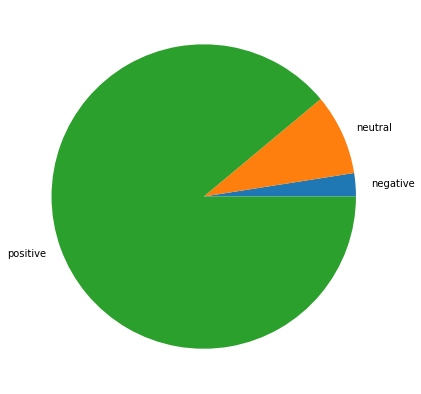

In [27]:
%matplotlib inline
fig = plt.figure(figsize=(7,7))
#add colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#colors = ['#ff9999','#66b3ff','#99ff99']
df.groupby(['sentiment_category']).size().plot.pie(label="")


In [35]:
%matplotlib inline


df_sentiments = df.groupby('sentiment_category').size()/df['sentiment_category'].count()*100
labels = df_sentiments.index
values = df_sentiments.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.8)])
fig.show()

To get clear picture of the neutral and negative catagories let us make a histogram plot. To do so we need to convert the categories into numbers uing the following function. Where we assigned positive =1, negative =-1, and neutral = 0.

In [29]:
#create a function to assign a number to category of the sentiments
def sentimentCategory_num(sent_num):
    if sent_num == "positive":
        return 1
    if sent_num == "negative":
        return -1
    else:
        return 0

In [30]:
#create a new column to hold sentiment category numbers
df['sentiment_category_num'] = df['sentiment_category'].apply(sentimentCategory_num)

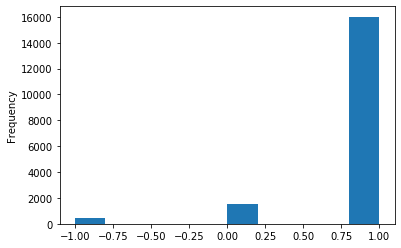

In [31]:
df['sentiment_category_num'].plot(kind='hist')

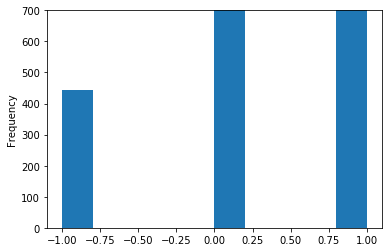

In [32]:
# zoom_in plots
df['sentiment_category_num'].plot(kind='hist', ylim=(0,700))

Overall, it seems that most customers feel positive.

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def make_wordcloud(words):

    text = ""
    for word in words:
        text = text + " " + word

    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords,colormap="magma",width=1920, height=1080,max_font_size=200, max_words=200, background_color="white").generate(text)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation="gaussian")
    plt.axis("off")
    plt.show()

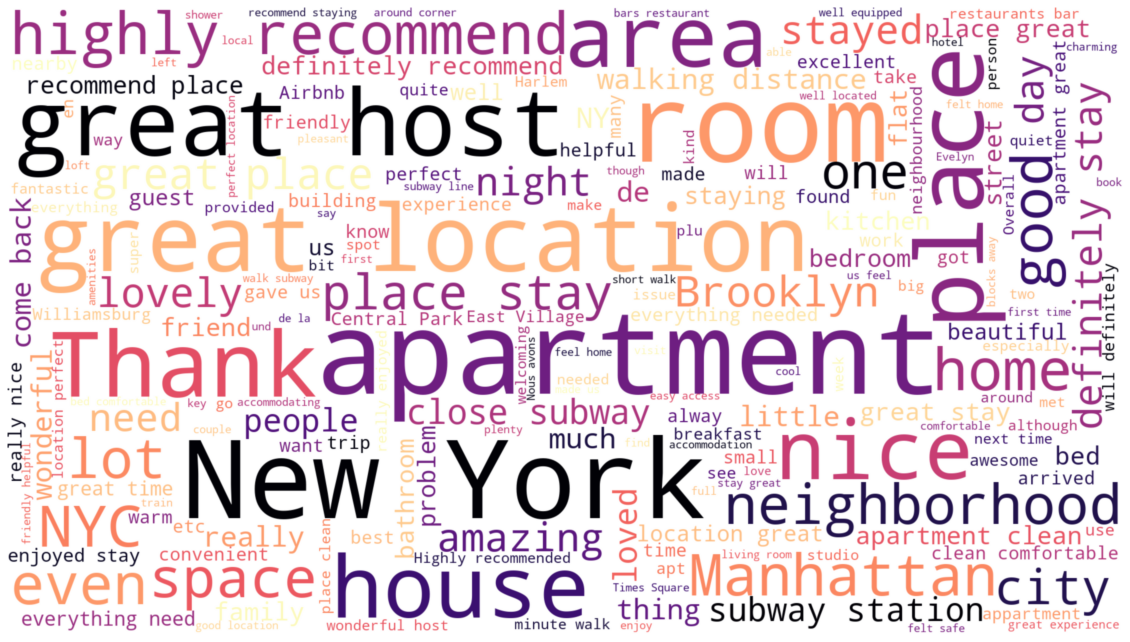

In [34]:
comments = df['comments']
make_wordcloud(comments)

# Concluding remarks

<ol>
    Analysis made based on setiment analysis and wordcloud wordcount provides the similar conclusion, and these are
<li>
    Reviews left for the airbnb services, as analaysed by sentiment analysis, indicates that customers overwhelmingly approve their hosts.
</li>
   <li>
    Word count on all the comments, excluding english stop words and punctuations, shows postive encouraging wordings.
</li> 
</ol>
    
### Observation on sentiment analysis
<ul>
<li>
    We note that comments left by languages other than english are seen to be categorized as nagative (German/Dutch) or neutral (Japanese).
</li>
    </ul>